<a href="https://colab.research.google.com/github/adarshukla3005/Stock_sentiment_analysis/blob/main/Amazon_stock_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
from bs4 import BeautifulSoup
import time

def get_ft_amazon_headlines(pages=50):
    headlines = []
    base_url = "https://www.ft.com/search?q=Amazon&page={}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    for page in range(1, pages + 1):
        url = base_url.format(page)
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        for item in soup.find_all('div', class_='o-teaser__content'):
            headline_tag = item.find('a', class_='js-teaser-heading-link')
            date_tag = item.find('time', class_='o-teaser__timestamp-date')

            if headline_tag and date_tag:
                headline = headline_tag.get_text().strip()

                date = date_tag.get_text().strip()
                headlines.append((headline, date))

        # Be respectful with a short delay to avoid overwhelming the server
        time.sleep(2)

    return headlines

# Fetch and print FT news headlines related to Amazon for 50 pages
ft_amazon_headlines = get_ft_amazon_headlines(pages=50)
for headline, date in ft_amazon_headlines:
    print(f"Headline: {headline}\n Date: {date}\n")


Headline: Amazon changes plans to order Nvidia ‘superchip’ to await updated model
 Date: May 21, 2024

Headline: Amazon breached UK’s Russia sanctions, claims ex-employee at tribunal
 Date: June 7, 2024

Headline: Amazon Web Services chief steps down amid AI race with rivals
 Date: May 14, 2024

Headline: AWS chief quits as Amazon’s cloud business focuses on AI race
 Date: May 14, 2024

Headline: Amazon’s strong cloud sales help power revenue gains
 Date: April 30, 2024

Headline: Amazon cloud sales growth accelerates as group prepares for more AI spending
 Date: April 30, 2024

Headline: FTAV’s further reading
 Date: June 14, 2024

Headline: Amazon shares close at record high from previous 2021 peak
 Date: April 11, 2024

Headline: The Everything War — taking on Amazon’s march to monopoly
 Date: April 27, 2024

Headline: Transcript: Shopify vs Amazon
 Date: April 11, 2024

Headline: Amazon shares close at record high for first time since 2021
 Date: April 11, 2024

Headline: Amazon pr

In [4]:
import pandas as pd
df = pd.DataFrame(ft_amazon_headlines, columns=['Headline',  'Date'])

In [5]:
df

,Headline,Date
0,Amazon changes plans to order Nvidia ‘superchi...,"May 21, 2024"
1,"Amazon breached UK’s Russia sanctions, claims ...","June 7, 2024"
2,Amazon Web Services chief steps down amid AI r...,"May 14, 2024"
3,AWS chief quits as Amazon’s cloud business foc...,"May 14, 2024"
4,Amazon’s strong cloud sales help power revenue...,"April 30, 2024"
...,...,...
991,The Future by Naomi Alderman — a game of survival,"October 25, 2023"
992,Nvidia races towards $1tn club as AI frenzy dr...,"May 25, 2023"
993,Big investors call on companies to slash use o...,"May 4, 2023"
994,Professionals find their competitive streak in...,"February 11, 2024"


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()


In [7]:
grouped_df

,Date,Headline
0,2022-10-27,Amazon shares plummet after dismal sales forec...
1,2022-10-28,US stock futures drop after Amazon earnings di...
2,2022-11-08,Tech’s odd couple
3,2022-11-10,Amazon scrutinises lossmaking units in search ...
4,2022-11-14,Amazon prepares for largest job cut in its his...
...,...,...
331,2024-06-14,FTAV’s further reading | Hollywood on Thames i...
332,2024-06-15,"Naomi Klein, an activist writer stalked by con..."
333,2024-06-16,Economics class: teaching ideas | Business cla...
334,2024-06-17,Stop debating carbon markets and start buildin...


In [8]:
pip install yfinance

In [9]:
import yfinance as yf
import pandas as pd

# Use the previously created grouped_df DataFrame with headlines

# Assuming grouped_df has the 'Date' column in datetime format

# Fetch Amazon stock data using yfinance
# Adjust the date range to match the dates in your grouped_df
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()

# Download stock data for Amazon (AMZN)
amzn_data = yf.download('AMZN', start=start_date, end=end_date)

# Reset index to make 'Date' a column
amzn_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, amzn_data, on='Date', how='left')

# Display the merged DataFrame
print(merged_df)

[*********************100%%**********************]  1 of 1 completed

          Date                                           Headline        Open  \
0   2022-10-27  Amazon shares plummet after dismal sales forec...  113.919998   
1   2022-10-28  US stock futures drop after Amazon earnings di...   97.910004   
2   2022-11-08                                  Tech’s odd couple   90.790001   
3   2022-11-10  Amazon scrutinises lossmaking units in search ...   92.940002   
4   2022-11-14  Amazon prepares for largest job cut in its his...   98.769997   
..         ...                                                ...         ...   
331 2024-06-14  FTAV’s further reading | Hollywood on Thames i...  183.080002   
332 2024-06-15  Naomi Klein, an activist writer stalked by con...         NaN   
333 2024-06-16  Economics class: teaching ideas | Business cla...         NaN   
334 2024-06-17  Stop debating carbon markets and start buildin...  182.520004   
335 2024-06-18  Best summer books of 2024: Technology | French...         NaN   

           High         Low

In [10]:
pip install pandas yfinance vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [23]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_ft_amazon_headlines(pages=50):
    headlines = []
    base_url = "https://www.ft.com/search?q=Amazon&page={}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    for page in range(1, pages + 1):
        url = base_url.format(page)
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        for item in soup.find_all('div', class_='o-teaser__content'):
            headline_tag = item.find('a', class_='js-teaser-heading-link')
            date_tag = item.find('time', class_='o-teaser__timestamp-date')

            if headline_tag and date_tag:
                headline = headline_tag.get_text().strip()
                date = date_tag.get_text().strip()
                headlines.append((headline, date))

        time.sleep(2)

    return headlines

# Fetch FT news headlines related to Amazon for 50 pages
ft_amazon_headlines = get_ft_amazon_headlines(pages=50)

# Create a DataFrame
df = pd.DataFrame(ft_amazon_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Amazon stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
amzn_data = yf.download('AMZN', start=start_date, end=end_date)

# Reset index to make 'Date' a column
amzn_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, amzn_data, on='Date', how='left')

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Calculate daily percentage change in stock price
merged_df['Price Change'] = merged_df['Close'].pct_change()

# Display the DataFrame with sentiment scores and price changes
print(merged_df[['Date', 'Headline', 'Sentiment', 'Price Change']])

# Calculate correlation between sentiment and stock price change
correlation = merged_df[['Sentiment', 'Price Change']].corr()
print("Correlation between sentiment and stock price change:")
print(correlation)


[*********************100%%**********************]  1 of 1 completed

          Date                                           Headline  Sentiment  \
0   2022-10-27  Amazon shares plummet after dismal sales forec...    -0.4939   
1   2022-10-28  Amazon: big spender must cut costs | US stock ...    -0.5423   
2   2022-11-10  Amazon scrutinises lossmaking units in search ...     0.1779   
3   2022-11-14  Amazon prepares for largest job cut in its his...    -0.2023   
4   2022-11-15                        Amazon set for big job cuts    -0.1280   
..         ...                                                ...        ...   
328 2024-06-14  FTAV’s further reading | Hollywood on Thames i...     0.2960   
329 2024-06-15  Naomi Klein, an activist writer stalked by con...     0.0000   
330 2024-06-16  US High School Economics class: teaching ideas...     0.0000   
331 2024-06-17  India pulls in tech giants for its AI ambition...     0.4588   
332 2024-06-18  French businesses court Marine Le Pen after ta...     0.3818   

     Price Change  
0             NaN  

In [16]:
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fetch FT news headlines related to Amazon for 50 pages
# ft_amazon_headlines = get_ft_amazon_headlines(pages=50)

# Create a DataFrame
# df = pd.DataFrame(ft_amazon_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Amazon stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
amzn_data = yf.download('AMZN', start=start_date, end=end_date)

# Reset index to make 'Date' a column
amzn_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, amzn_data, on='Date', how='left')

# Label stock price movements
merged_df['Price Movement'] = merged_df['Close'].diff().shift(-1)
merged_df['Price Movement'] = merged_df['Price Movement'].apply(lambda x: 1 if x > 0 else 0)

# Drop rows with NaN values created by shift
merged_df = merged_df.dropna(subset=['Price Movement'])

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Display the DataFrame with sentiment scores and price movements
print(merged_df[['Date', 'Headline', 'Sentiment', 'Price Movement']])

[*********************100%%**********************]  1 of 1 completed

          Date                                           Headline  Sentiment  \
0   2022-10-27  Amazon shares plummet after dismal sales forec...    -0.4939   
1   2022-10-28  US stock futures drop after Amazon earnings di...    -0.5423   
2   2022-11-08                                  Tech’s odd couple    -0.3182   
3   2022-11-10  Amazon scrutinises lossmaking units in search ...     0.3400   
4   2022-11-14  Amazon prepares for largest job cut in its his...    -0.2023   
..         ...                                                ...        ...   
332 2024-06-14  Hollywood on Thames is a prize for the UK econ...     0.2960   
333 2024-06-15  Naomi Klein, an activist writer stalked by con...     0.0000   
334 2024-06-16  Economics class: teaching ideas | Business cla...     0.0000   
335 2024-06-17  The bullish case for TSMC | Best summer books ...     0.4588   
336 2024-06-18  French businesses court Marine Le Pen after ta...     0.3818   

     Price Movement  
0                

In [18]:
import openpyxl

In [19]:
eww=merged_df.to_excel('ada.xlsx')

In [ ]:
# Use TF-IDF Vectorizer to convert textual data to numerical data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(merged_df['Headline'])

# Combine text features with sentiment score
X = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X['Sentiment'] = merged_df['Sentiment'].values

# Define target variable
y = merged_df['Price Movement']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

[*********************100%%**********************]  1 of 1 completed


Model: Logistic Regression
Accuracy: 0.4179
Precision: 0.3976
Recall: 0.4075
F1-score: 0.3862
ROC AUC: 0.5424




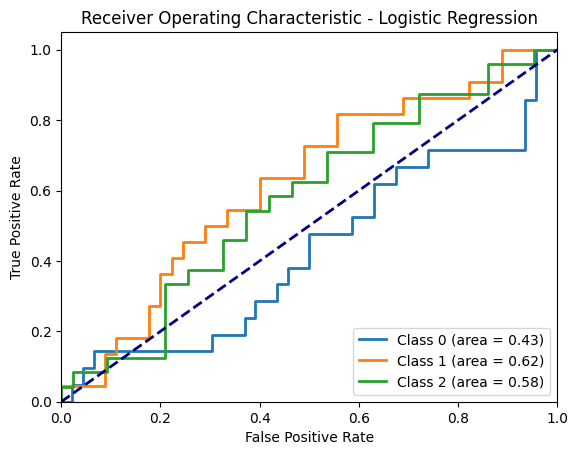

Model: Support Vector Machine
Accuracy: 0.3582
Precision: 0.3396
Recall: 0.3461
F1-score: 0.3172
ROC AUC: 0.4593




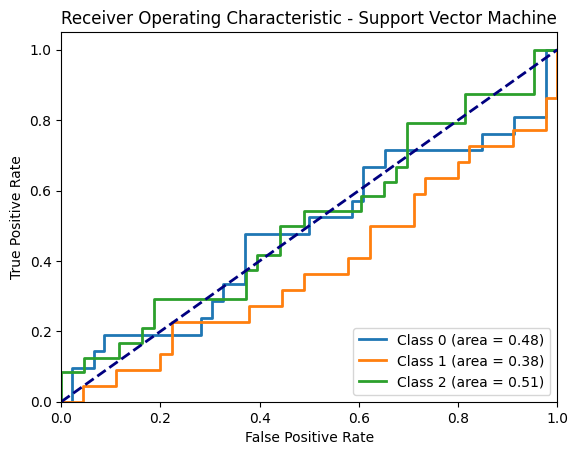

Model: Random Forest
Accuracy: 0.3731
Precision: 0.3751
Recall: 0.3645
F1-score: 0.3493
ROC AUC: 0.5523




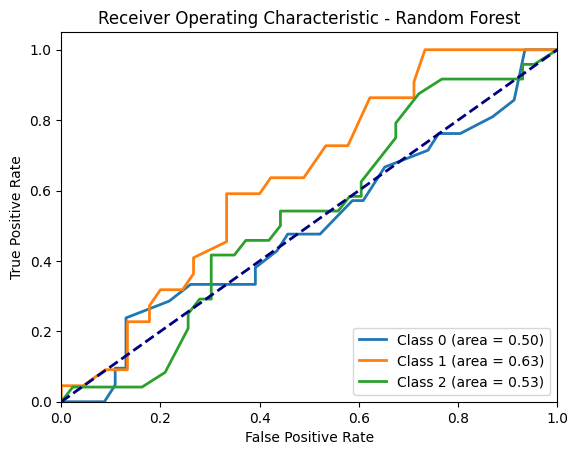

Model: Neural Network
Accuracy: 0.3731
Precision: 0.3778
Recall: 0.3698
F1-score: 0.3697
ROC AUC: 0.5387




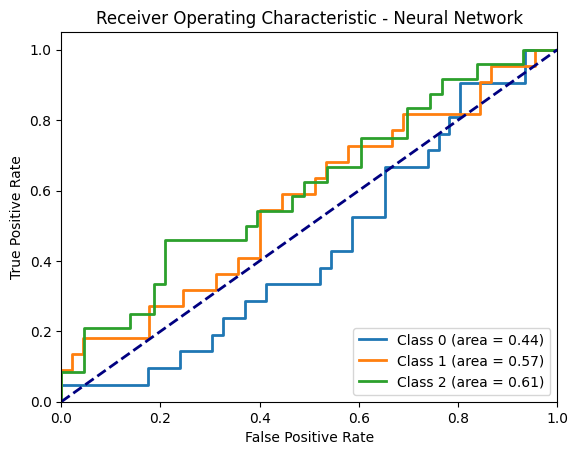

In [24]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Function to get FT Amazon headlines
def get_ft_amazon_headlines(pages=100):
    headlines = []
    base_url = "https://www.ft.com/search?q=Amazon&page={}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    for page in range(1, pages + 1):
        url = base_url.format(page)
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        for item in soup.find_all('div', class_='o-teaser__content'):
            headline_tag = item.find('a', class_='js-teaser-heading-link')
            date_tag = item.find('time', class_='o-teaser__timestamp-date')

            if headline_tag and date_tag:
                headline = headline_tag.get_text().strip()
                date = date_tag.get_text().strip()
                headlines.append((headline, date))

        time.sleep(2)

    return headlines

# Fetch FT news headlines related to Amazon for 100 pages
ft_amazon_headlines = get_ft_amazon_headlines(pages=100)

# Create a DataFrame
df = pd.DataFrame(ft_amazon_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Amazon stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
amzn_data = yf.download('AMZN', start=start_date, end=end_date)

# Reset index to make 'Date' a column
amzn_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, amzn_data, on='Date', how='left')

# Label stock price movements
merged_df['Price Movement'] = merged_df['Close'].diff().shift(-1)
merged_df['Price Movement'] = merged_df['Price Movement'].apply(lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change'))

# Drop rows with NaN values created by shift
merged_df = merged_df.dropna(subset=['Price Movement'])

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Use TF-IDF Vectorizer to convert textual data to numerical data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(merged_df['Headline'])

# Combine text features with sentiment score
X = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X['Sentiment'] = merged_df['Sentiment'].values

# Define target variable
y = merged_df['Price Movement']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    if y_proba.ndim == 1:
        y_proba = y_proba.reshape(-1, 1)

    # Binarize the output labels for ROC AUC calculation
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_binarized = lb.transform(y_test)

    if y_test_binarized.shape[1] == 1:
        y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

    roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovo', average='macro')

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")

    # Plot ROC curve
    fpr = {}
    tpr = {}
    roc_auc_dict = {}
    for i in range(y_test_binarized.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        roc_auc_dict[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(y_test_binarized.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc_dict[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()

[*********************100%%**********************]  1 of 1 completed


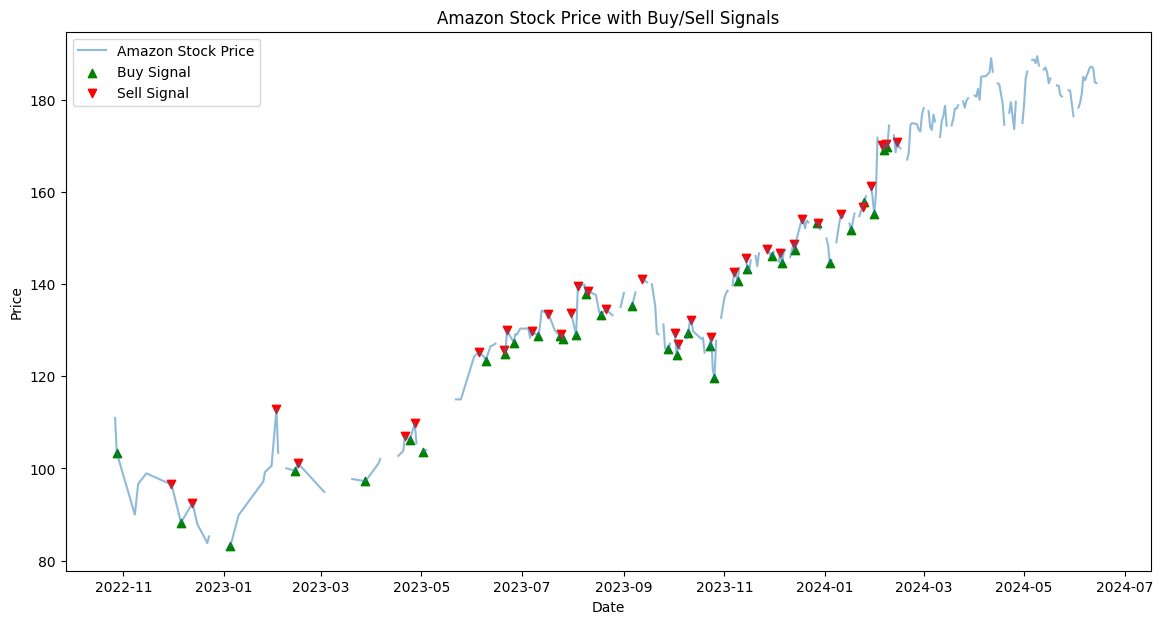

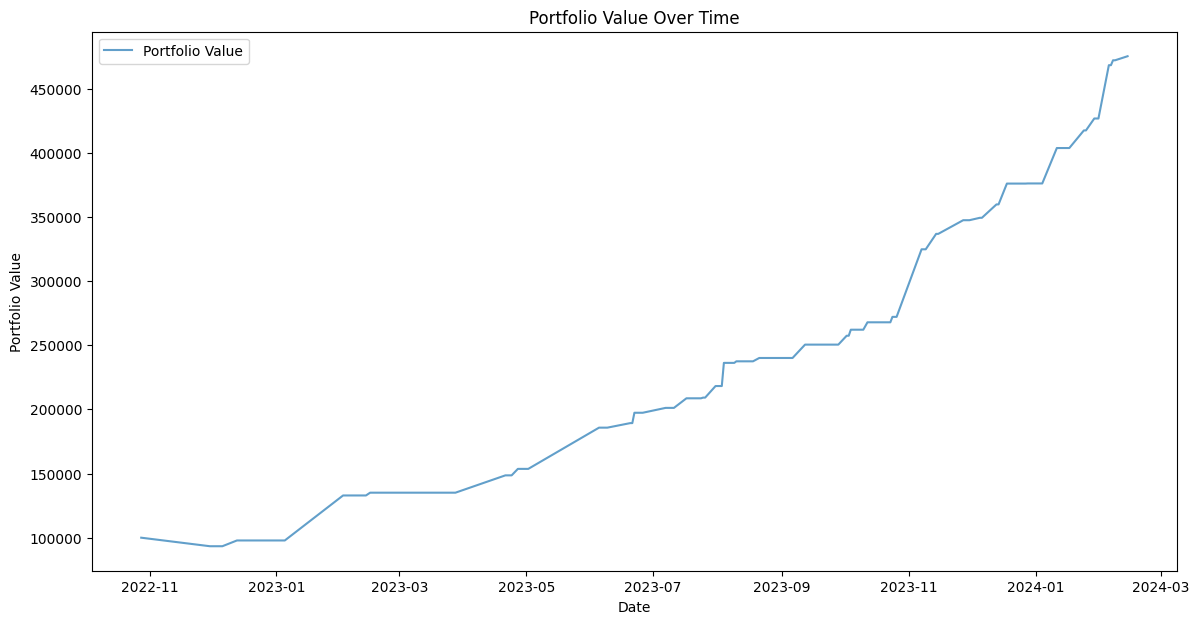

         Date Action       Price     Position  Portfolio Value
0  2022-10-28    BUY  103.410004   967.024431    100000.000000
1  2022-11-30   SELL   96.540001     0.000000     93356.539500
2  2022-12-06    BUY   88.250000  1057.864470     93356.539500
3  2022-12-13   SELL   92.489998     0.000000     97841.882594
4  2023-01-05    BUY   83.120003  1177.115969     97841.882594
..        ...    ...         ...          ...              ...
64 2024-02-06    BUY  169.149994  2767.772736    468168.741377
65 2024-02-07   SELL  170.529999     0.000000    471988.281267
66 2024-02-08    BUY  169.839996  2779.017260    471988.281267
67 2024-02-14   SELL  170.979996     0.000000    475156.359247
68 2024-02-18    BUY         NaN          NaN              NaN

[69 rows x 5 columns]


In [26]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Function to get FT Amazon headlines
def get_ft_amazon_headlines(pages=100):
    headlines = []
    base_url = "https://www.ft.com/search?q=Amazon&page={}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    for page in range(1, pages + 1):
        url = base_url.format(page)
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        for item in soup.find_all('div', class_='o-teaser__content'):
            headline_tag = item.find('a', class_='js-teaser-heading-link')
            date_tag = item.find('time', class_='o-teaser__timestamp-date')

            if headline_tag and date_tag:
                headline = headline_tag.get_text().strip()
                date = date_tag.get_text().strip()
                headlines.append((headline, date))

        time.sleep(2)

    return headlines

# Fetch FT news headlines related to Amazon for 100 pages
# ft_amazon_headlines = get_ft_amazon_headlines(pages=100)

# # Create a DataFrame
# df = pd.DataFrame(ft_amazon_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Amazon stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
amzn_data = yf.download('AMZN', start=start_date, end=end_date)

# Reset index to make 'Date' a column
amzn_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, amzn_data, on='Date', how='left')

# Label stock price movements
merged_df['Price Movement'] = merged_df['Close'].diff().shift(-1)
merged_df['Price Movement'] = merged_df['Price Movement'].apply(lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change'))

# Drop rows with NaN values created by shift
merged_df = merged_df.dropna(subset=['Price Movement'])

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Use TF-IDF Vectorizer to convert textual data to numerical data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(merged_df['Headline'])

# Combine text features with sentiment score
X = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X['Sentiment'] = merged_df['Sentiment'].values

# Define target variable
y = merged_df['Price Movement']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Choose the classifier you want to use
clf = classifiers['Random Forest']
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate trading signals based on predictions
merged_df['Signal'] = clf.predict(X)

# Simulate trading strategy
initial_capital = 100000
capital = initial_capital
position = 0
portfolio = []

for i, row in merged_df.iterrows():
    if row['Signal'] == 'Increase' and position == 0:
        position = capital / row['Close']
        capital = 0
        portfolio.append((row['Date'], 'BUY', row['Close'], position, capital + position * row['Close']))
    elif row['Signal'] == 'Decrease' and position > 0:
        capital = position * row['Close']
        position = 0
        portfolio.append((row['Date'], 'SELL', row['Close'], position, capital))

portfolio_df = pd.DataFrame(portfolio, columns=['Date', 'Action', 'Price', 'Position', 'Portfolio Value'])

# Plot the stock price and buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Close'], label='Amazon Stock Price', alpha=0.5)
buy_signals = portfolio_df[portfolio_df['Action'] == 'BUY']
sell_signals = portfolio_df[portfolio_df['Action'] == 'SELL']
plt.scatter(buy_signals['Date'], buy_signals['Price'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_signals['Date'], sell_signals['Price'], marker='v', color='r', label='Sell Signal', alpha=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Amazon Stock Price with Buy/Sell Signals')
plt.legend()
plt.show()

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_df['Date'], portfolio_df['Portfolio Value'], label='Portfolio Value', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

# Display the portfolio DataFrame
print(portfolio_df)